<a href="https://colab.research.google.com/github/brunatoloti/quarentena-dados/blob/master/exercicios/aula_e_desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula 01 - Dados do MovieLens

In [ ]:
import pandas as pd
import numpy as np

Importando os dados dos filmes: Id do Filme, Título e Gênero


In [ ]:
movies = pd.read_csv('drive/My Drive/Estudos Python/QuarentenaDados - Alura/dados/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Importando os dados das avaliações dos filmes: Id do Usuário, Id do Filme, Nota e Momento.


In [ ]:
ratings = pd.read_csv('drive/My Drive/Estudos Python/QuarentenaDados - Alura/dados/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Fazendo um describe para ter as descrições estatísticas do dataframe ratings.

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Fazendo uma query para que só tenhamos as notas e outras informações do filme cujo Id é 1.

In [ ]:
rating_movie1 = ratings.query('movieId == 1')
rating_movie1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Fazendo a média de notas do filme cujo Id é 1. Note que, pela primeira linha, teríamos a média de todas as colunas de ratings para o filme 1, mas não faz sentido. Por isso, na segunda linha, peguei apenas a coluna que possui as notas.

In [ ]:
mean_rating_movie1 = ratings.query('movieId  == 1').mean()
mean_rating_movie1['rating']

3.9209302325581397

Ao invés de pegar a média de notas de um filme específico, posso fazer a média de notas para cada filme, usando o método groupby. (A média é feita na coluna rating do dataframe ratings para cada movieId)

In [ ]:
mean_ratings = ratings.groupby('movieId')['rating'].mean()
mean_ratings.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Juntando o dataframe movies com a series mean_ratings em um novo dataframe, pois assim teremos todas as informações dos filmes e suas respectivas notas médias.

In [ ]:
movies_with_mean = movies.join(mean_ratings, on='movieId')
movies_with_mean.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando o dataframe pela nota de forma decrescente. Ou seja, os filmes com notas maiores vêm primeiro que os filmes com notas menores.

In [ ]:
movies_with_mean.sort_values('rating', ascending=False).head()

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


Agora, vamos plotar gráficos de alguns filmes para ver como as notas estão distribuídas. Aqui, vamos usar o gráfico de histograma pois queremos ver realmente a distribuição das notas. Por padrão, teríamos um gráfico de linhas, mas esse tipo não casa bem com o problema que temos aqui. Por isso, devemos colocar o tipo que queremos.

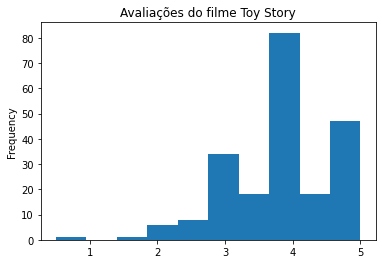

In [ ]:
import matplotlib.pyplot as plt

ratings.query('movieId == 1')['rating'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')
plt.show()

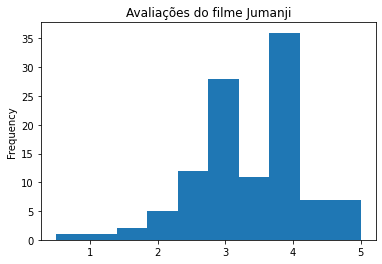

In [ ]:
ratings.query('movieId == 2')['rating'].plot(kind='hist')
plt.title('Avaliações do filme Jumanji')
plt.show()

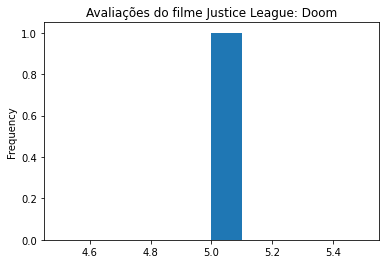

In [ ]:
ratings.query('movieId == 102084')['rating'].plot(kind='hist')
plt.title('Avaliações do filme Justice League: Doom')
plt.show()

Lembrando que:
*   Toy Story e Jumanji possuem quase a mesma nota média: 3,92 e 3,43, respectivamente.
*   Justice League: Doom possui nota média igual a 5.
*   Todo mundo conhece Toy Story e Jumanji.
*   Quase ninguém conhece Justice League: Doom.

É estranho, dado esse dois últimos apontamentos, que Justice League: Doom tenha uma nota tão melhor que Toy Story e Jumanji? Sim, pode ser! 
Mas, uma justificativa para isso ocorrer é que a média das notas reflete tanto a distribuição das notas quanto a quantidade de avaliações de cada filme. Note nos histogramas:
*   Toy Story levou mais notas 5 e 4 do que outras notas;
*   Jumanji levou mais notas 4 e 3 do que outras notas;
Essa questão pode explicar o porquê Toy Story é melhor avaliado que Jumanji, mas também o porquê de eles estarem com médias próximas (tanto um quanto outro possuem maioria de nota 4).
Então vemos o quanto a distribuição das notas afeta a média.
*   Justice League: Doom possui apenas uma avaliação e essa avaliação é nota 5.
Isso explica o porquê Justice League: Doom possui média 5, mesmo sendo pouco conhecido. Apenas uma pessoa o avaliou e o avaliou com nota 5. Repare que se mais uma pessoa avaliar esse filme com uma nota 0, a média vai para 2,5 (fazendo com que ele não seja tão bom assim quanto parece na situação anterior).
Então vemos o quanto a quantidade de votos afeta as notas médias. 









##Desafios - Aula 1

Desafio 1: Determine quantos filmes não tem avaliações e quais são esses filmes.

In [ ]:
qt_movies_with_nan = sum(movies_with_mean['rating'].isna())
qt_movies_with_nan

18

In [ ]:
#ou fazendo de outra forma
movies_with_mean_with_nan = movies_with_mean.query('rating.isnull()', engine='python')
movies_with_mean_with_nan

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [ ]:
#Também podemos contar quantas linhas o dataframe filtrado apenas para rating==Nan tem.
movies_with_mean_with_nan['movieId'].count()

18

Desafio 2: Mudar o nome da coluna 'rating' do dataframe **movies_with_mean** para 'mean_rating' após o join.

In [ ]:
movies_with_mean = movies_with_mean.rename(columns={'rating': 'mean_rating'})
movies_with_mean

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média, mas o total de notas por filme.

In [ ]:
count_rating = ratings.groupby('movieId')['rating'].count()
count_rating.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [ ]:
movies_with_mean_count = movies_with_mean.join(count_rating, on='movieId')
movies_with_mean_count = movies_with_mean_count.rename(columns={'rating':'quantity_rating'})
movies_with_mean_count.head()

,movieId,title,genres,mean_rating,quantity_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [ ]:
#Podemos fazer uma ordenação por mean_rating e depois por quantity_rating
movies_with_mean_count.sort_values('mean_rating', ascending=False).head()

,movieId,title,genres,mean_rating,quantity_rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0


In [ ]:
movies_with_mean_count.sort_values('quantity_rating', ascending=False).head()

,movieId,title,genres,mean_rating,quantity_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0


Desafio 4: Arredondar as médias (coluna de notas médias) para duas casas decimais.

In [ ]:
movies_with_mean_count['mean_rating'] = round(movies_with_mean_count['mean_rating'],2)
movies_with_mean_count.head()

,movieId,title,genres,mean_rating,quantity_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


Desafio 5: Descobrir os gêneros dos filmes (quais são eles, únicos).

In [ ]:
unique_genres = pd.DataFrame(movies_with_mean_count['genres'].str.split("|").to_list()).stack()
unique_genres = unique_genres.reset_index()
unique_genres = unique_genres.drop(columns=['level_0','level_1'])
unique_genres.columns = ['genre']
genres = unique_genres['genre'].unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

Desafio 6: Contar o número de aparições de cada gênero

In [ ]:
genres_quantity = unique_genres['genre'].value_counts()
genres_quantity

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genre, dtype: int64

Desafio 7: Plotar o gráfico de aparições de cada gênero em um gráfico de barras.

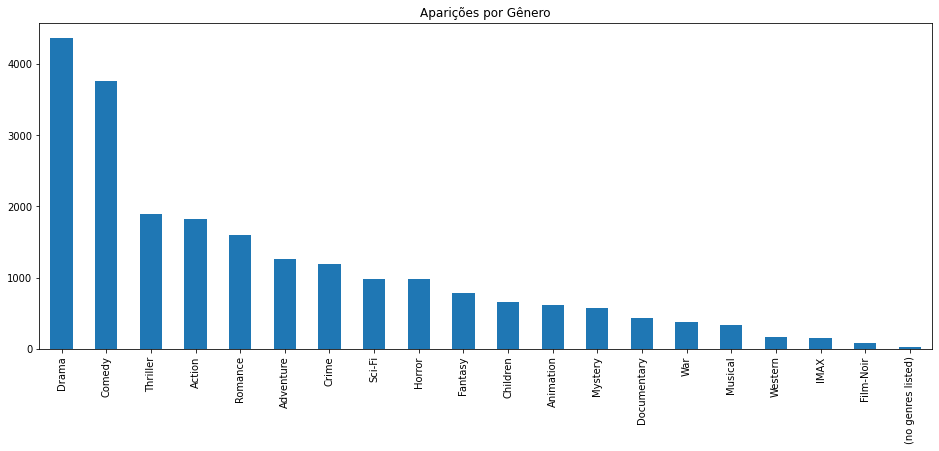

In [ ]:
genres_quantity.plot(kind='bar', figsize=(16,6))
plt.title("Aparições por Gênero")
plt.show()